In [27]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os

In [81]:
DATA_PATH = "raw/"
ITERATIONS = ["_1","_2","_3","_4","_5"]
DEVICES = ["k120", "6312kw" ,"nixdorf", "bt58", "rival" ,"intelli_new", "intelli_og", "apple1152", "sunplus", "dragonrise_green", "g5",
"g300", "sigma", "exxter", "px1800", "gembird", "g15", "wingman", "dragonrise_black", "arduino", "rapoo", "trust_oni_wireless", "xboxone_wireless",
"dualshock4_wired", "xbox360_wireless", "tramani_wired", "dualshock3_wired", "xbox360_wired", "adns5700", "logilink0043",
"diamondback", "rx250", "nvidiashield"]

POLLING_RATES = {"k120":10, "6312kw":-1 ,"nixdorf":-1, "bt58":10, "rival":1 ,"intelli_new":1, "intelli_og":-1, "apple1152":10, "sunplus":10, "dragonrise_green":10, "g5":10,
"g300":1, "sigma":10, "exxter":10, "px1800":10, "gembird":10, "g15":24, "wingman":10, "dragonrise_black":10, "arduino":1, "rapoo":-1, "trust_oni_wireless":10, "xboxone_wireless":-1,
"dualshock4_wired":5, "xbox360_wireless":-1, "tramani_wired":10, "dualshock3_wired":1, "xbox360_wired":-1, "adns5700":10, "logilink0043":10,
"diamondback":10, "rx250":10, "nvidiashield":1}

MODES = ["default", "1000 Hz"]

all_raw_data = []

for device in DEVICES:
    for mode in MODES:
        for iteration in ITERATIONS:
            if mode == "default":
                try:
                    path = DATA_PATH + mode + "/" + "AUTO_" + device + "_0ms" + iteration +".csv"
                    print(path)
                    currentFile = pd.read_csv(path, comment="#" ,delimiter=';')
                except:
                    print("file missing: ", mode, device)
                currentFile["device"] = device
                currentFile["polling"] = mode
            else:
                try:
                    currentFile = pd.read_csv(DATA_PATH + mode + "/" + "AUTO_" + device + "_1ms", + iteration, comment="#")
                except:
                    print("file missing: ", mode, device)
                currentFile["device"] = device
                currentFile["polling"] = mode
            print(type(currentFile))
            print(len(currentFile))        
            all_raw_data.append(currentFile)
all_data = pd.concat(all_raw_data)
all_data["latency (ms)"] = all_data["latency (s)"] * 1000.0

raw/default/AUTO_k120_0ms_1.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_k120_0ms_2.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_k120_0ms_3.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_k120_0ms_4.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_k120_0ms_5.csv
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz k120
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz k120
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz k120
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz k120
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz k120
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_6312kw_0ms_1.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_6312kw_0ms_2.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_6312kw_0ms_3.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_6312kw_0ms_4.csv
<clas

<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_logilink0043_0ms_2.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_logilink0043_0ms_3.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_logilink0043_0ms_4.csv
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_logilink0043_0ms_5.csv
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz logilink0043
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz logilink0043
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz logilink0043
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz logilink0043
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1000 Hz logilink0043
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_diamondback_0ms_1.csv
file missing:  default diamondback
<class 'pandas.core.frame.DataFrame'>
1000
raw/default/AUTO_diamondback_0ms_2.csv
file missing:  default diamondback
<class 'pandas.core.frame.DataFrame'>
1

KeyError: 'latency (s)'

In [29]:
all_data

,counter,latency,delayTime,device,polling
0,0,23551,8065,k120,default
1,1,19633,4222,k120,default
2,2,16895,7003,k120,default
3,3,24248,7642,k120,default
4,4,22995,910,k120,default
5,5,22357,1513,k120,default
6,6,16169,7777,k120,default
7,7,25007,6949,k120,default
8,8,21795,1990,k120,default
9,9,23392,505,k120,default


(0, 100)

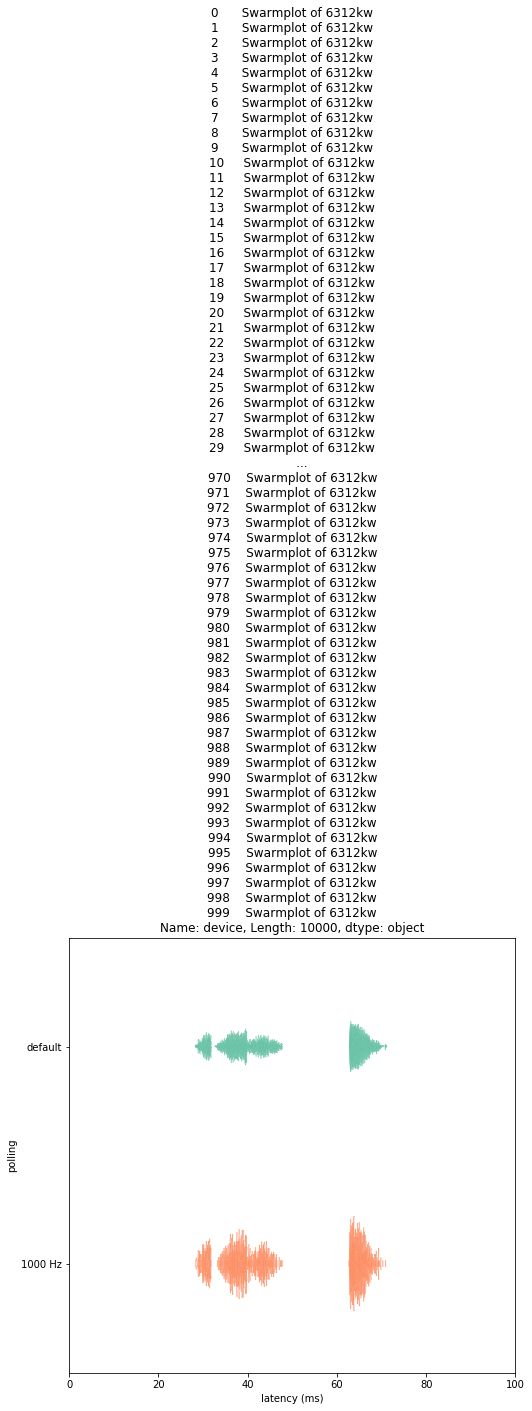

In [80]:
#Plotting a single swarmplot
values = all_data[(all_data["device"] == "6312kw")]

plt.figure(figsize=[8, 8])
#plt.title('Swarmplot of '+ values["device"])

#plt.figure()

ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set2", size=1, marker="D",orient="h", alpha=1)
plt.xlabel("latency (ms)")
plt.xlim(0, 100)

#axes = plt.gca()
#axes.set_xlim(0,100)





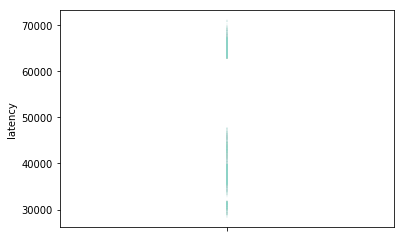

In [46]:
ax = sns.stripplot(values["latency"], palette="Set3", size=1, orient="v", alpha=0.1, )

